In [5]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: missingno in c:\users\anshika\anaconda3\lib\site-packages (0.5.2)



In [6]:
import pandas as pd
import numpy as np
import missingno as ms

In [7]:
data = pd.read_csv('melb_data.csv')

In [8]:
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [9]:
data.shape

(13580, 21)

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [11]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [12]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<Axes: >

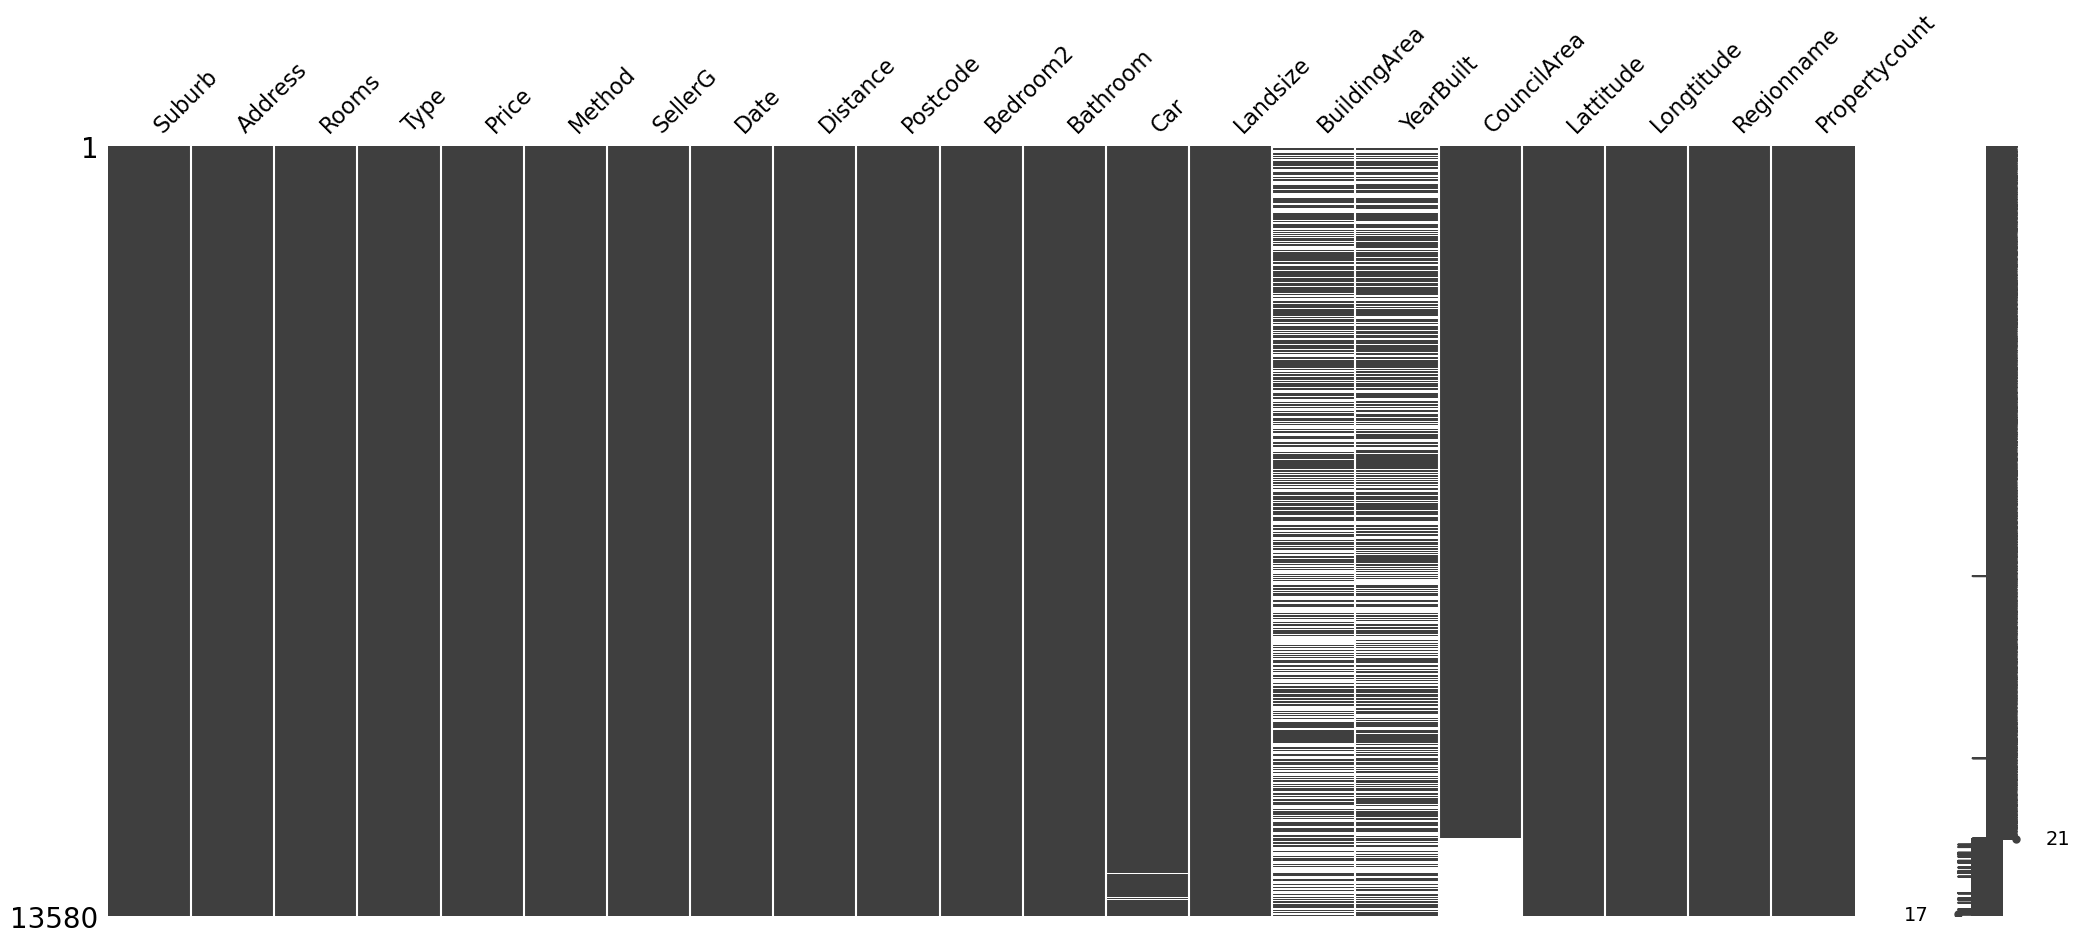

In [13]:
ms.matrix(data)

## Handling NaN Values

In [14]:
data["Car"].fillna(data["Car"].median(skipna=True), inplace=True)
data["BuildingArea"].fillna(data["BuildingArea"].median(skipna=True), inplace=True)
data["YearBuilt"].fillna(data["YearBuilt"].median(skipna=True), inplace=True)

In [15]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [16]:
data = data.dropna(subset=["CouncilArea"])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Address        12211 non-null  object 
 2   Rooms          12211 non-null  int64  
 3   Type           12211 non-null  object 
 4   Price          12211 non-null  float64
 5   Method         12211 non-null  object 
 6   SellerG        12211 non-null  object 
 7   Date           12211 non-null  object 
 8   Distance       12211 non-null  float64
 9   Postcode       12211 non-null  float64
 10  Bedroom2       12211 non-null  float64
 11  Bathroom       12211 non-null  float64
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  BuildingArea   12211 non-null  float64
 15  YearBuilt      12211 non-null  float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      12211 non-null  float64
 18  Longtitude 

In [18]:
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,126.0,1970.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,126.0,1970.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [19]:
pd.to_datetime(data["Date"], format = "%d/%m/%Y")

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
12208   2017-07-29
12209   2017-07-29
12210   2017-07-29
12211   2017-07-29
12212   2017-07-29
Name: Date, Length: 12211, dtype: datetime64[ns]

In [20]:
data = data.astype({'YearBuilt':'int','Postcode':'int','Bedroom2':'int','Bathroom':'int'})

In [21]:
data.select_dtypes(exclude='object').dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode           int32
Bedroom2           int32
Bathroom           int32
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt          int32
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [22]:
data.select_dtypes(include='object').dtypes

Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object

In [21]:
result = pd.get_dummies(data,columns=["Type","Method"])
result.head(10)

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Regionname,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067,2,1,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067,2,1,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067,3,2,...,Northern Metropolitan,4019.0,True,False,False,False,False,False,True,False
3,Abbotsford,40 Federation La,3,850000.0,Biggin,4/03/2017,2.5,3067,3,2,...,Northern Metropolitan,4019.0,True,False,False,True,False,False,False,False
4,Abbotsford,55a Park St,4,1600000.0,Nelson,4/06/2016,2.5,3067,3,1,...,Northern Metropolitan,4019.0,True,False,False,False,False,False,False,True
5,Abbotsford,129 Charles St,2,941000.0,Jellis,7/05/2016,2.5,3067,2,1,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False
6,Abbotsford,124 Yarra St,3,1876000.0,Nelson,7/05/2016,2.5,3067,4,2,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False
7,Abbotsford,98 Charles St,2,1636000.0,Nelson,8/10/2016,2.5,3067,2,1,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False
8,Abbotsford,6/241 Nicholson St,1,300000.0,Biggin,8/10/2016,2.5,3067,1,1,...,Northern Metropolitan,4019.0,False,False,True,False,True,False,False,False
9,Abbotsford,10 Valiant St,2,1097000.0,Biggin,8/10/2016,2.5,3067,3,1,...,Northern Metropolitan,4019.0,True,False,False,False,True,False,False,False


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Address        12211 non-null  object 
 2   Rooms          12211 non-null  int64  
 3   Type           12211 non-null  object 
 4   Price          12211 non-null  float64
 5   Method         12211 non-null  object 
 6   SellerG        12211 non-null  object 
 7   Date           12211 non-null  object 
 8   Distance       12211 non-null  float64
 9   Postcode       12211 non-null  int32  
 10  Bedroom2       12211 non-null  int32  
 11  Bathroom       12211 non-null  int32  
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  BuildingArea   12211 non-null  float64
 15  YearBuilt      12211 non-null  int32  
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      12211 non-null  float64
 18  Longtitude 

In [28]:
pd.to_datetime(data["Date"], format="%d/%m/%Y")

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
12208   2017-07-29
12209   2017-07-29
12210   2017-07-29
12211   2017-07-29
12212   2017-07-29
Name: Date, Length: 12211, dtype: datetime64[ns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Address        12211 non-null  object 
 2   Rooms          12211 non-null  int64  
 3   Type           12211 non-null  object 
 4   Price          12211 non-null  float64
 5   Method         12211 non-null  object 
 6   SellerG        12211 non-null  object 
 7   Date           12211 non-null  object 
 8   Distance       12211 non-null  float64
 9   Postcode       12211 non-null  int32  
 10  Bedroom2       12211 non-null  int32  
 11  Bathroom       12211 non-null  int32  
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  BuildingArea   12211 non-null  float64
 15  YearBuilt      12211 non-null  int32  
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      12211 non-null  float64
 18  Longtitude 

In [13]:
n_clmns = [c for c in data.columns if data[c].dtype != np.dtype('O')]
n_clmns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [15]:
len(n_clmns) , len(data.columns)

(13, 21)

In [16]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')


In [4]:
data_new = data[n_clmns]
data_new.head()

NameError: name 'data' is not defined

In [18]:
data_new.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [19]:
data_new.shape

(13580, 13)

In [22]:
data_new.dropna(axis=1, inplace=True)
normalized_data = normalize.fit_transform(data_new)
pd.DataFrame(normalized_data, columns = data_new.columns)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
0,0.111111,0.156478,0.051975,0.068577,0.10,0.125,0.000466,0.494755,0.517651,0.176160
1,0.111111,0.106562,0.051975,0.068577,0.10,0.125,0.000360,0.484031,0.513083,0.176160
2,0.222222,0.154795,0.051975,0.068577,0.15,0.250,0.000309,0.482223,0.513997,0.176160
3,0.222222,0.085810,0.051975,0.068577,0.15,0.250,0.000217,0.498243,0.516281,0.176160
4,0.333333,0.169938,0.051975,0.068577,0.15,0.125,0.000277,0.484936,0.513723,0.176160
...,...,...,...,...,...,...,...,...,...,...
13575,0.333333,0.130118,0.347193,0.153531,0.20,0.250,0.001506,0.357781,0.672246,0.333769
13576,0.222222,0.106113,0.141372,0.016377,0.15,0.250,0.000769,0.417664,0.408601,0.286482
13577,0.222222,0.121705,0.141372,0.016377,0.15,0.250,0.001007,0.426100,0.416221,0.286482
13578,0.333333,0.270892,0.141372,0.016377,0.20,0.125,0.002000,0.417909,0.421346,0.286482


In [2]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [3]:
data_new.dropna(axis=1, inplace=True)
standardized_data = standard.fit_transform(data_new)
pd.DataFrame(standardized_data, columns = data_new.columns)

NameError: name 'data_new' is not defined